In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("translated_swiss_eb.csv")

In [28]:
df.head()#verinin tablo seklinde gösterimi

,Year,Category,Energy Carrier,TJ
0,1980,Gross consumption,electricity,-29450.0
1,1980,Gross consumption,Petroleum,321250.0
2,1980,Gross consumption,District heating,0.0
3,1980,Gross consumption,gas,36280.0
4,1980,Gross consumption,Wood energy,26280.0


In [29]:
df.head(15)#istediğimiz kadar verinin gösterimi

,Year,Category,Energy Carrier,TJ
0,1980,Gross consumption,electricity,-29450.0
1,1980,Gross consumption,Petroleum,321250.0
2,1980,Gross consumption,District heating,0.0
3,1980,Gross consumption,gas,36280.0
4,1980,Gross consumption,Wood energy,26280.0
5,1980,Gross consumption,Core fuel,149050.0
6,1980,Gross consumption,Money,14300.0
7,1980,Gross consumption,Garbage and industrial waste,10100.0
8,1980,Gross consumption,crude oil,191970.0
9,1980,Gross consumption,Extendation of renewable energies,NaN


In [30]:
df["Category"].unique()

array(['Gross consumption',
       'Self -consumption of the energy sector, network losses, consumption of storage',
       'End consumption - services', 'End consumption - households',
       'End consumption - industry',
       'End consumption - statistical difference including agriculture',
       'End consumption - total', 'End consumption - traffic',
       'Energy conversion - various renewable',
       'Energy conversion - gas works',
       'Energy conversion - nuclear power plants',
       'Energy conversion - refineries',
       'Energy conversion - hydropower plants',
       'Energy conversion- conventional-thermal power, television heating and television power plants',
       'export', 'import', 'Domestic production', 'Warehouse change',
       'Non -energy consumption'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8987 entries, 0 to 8986
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            8987 non-null   int64  
 1   Category        8987 non-null   object 
 2   Energy Carrier  8987 non-null   object 
 3   TJ              4394 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 281.0+ KB


In [32]:
df.columns#kategoriler

Index(['Year', 'Category', 'Energy Carrier', 'TJ'], dtype='object')

In [33]:
df.isnull().sum() #nerede ne kadar eksik değer var görmeme yarıyor

Year                 0
Category             0
Energy Carrier       0
TJ                4593
dtype: int64

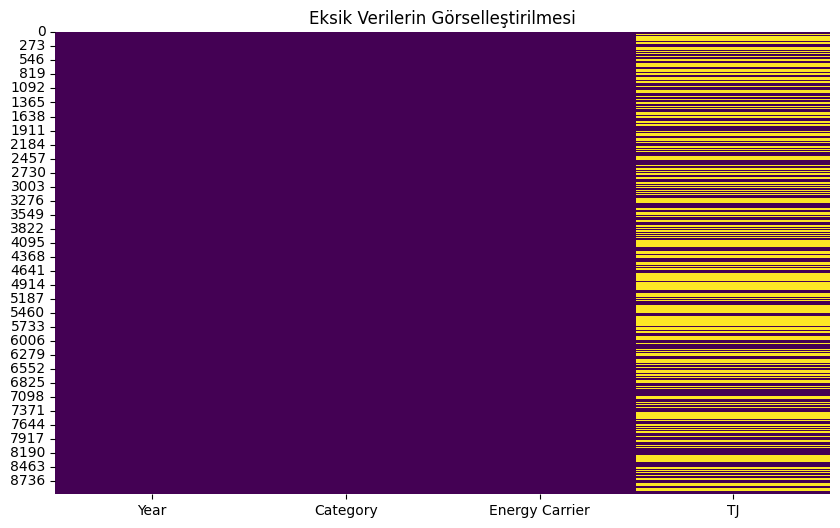

In [34]:
# Eksik verileri görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Verilerin Görselleştirilmesi')
plt.show()

In [35]:
df["Year"].value_counts().reset_index()

,Year,count
0,1980,209
1,1981,209
2,1982,209
3,1983,209
4,1984,209
5,1985,209
6,1986,209
7,1987,209
8,1988,209
9,1989,209


In [36]:
#df.fillna(df.mean(), inplace=True) #boş satırları ortalama bir değerle doldurmak için bunu kullandım fakat sayısal değerler olduğu için hata aldım.
#bu yüzden chat gpt den yardım alarak aşağıdaki kodu yazdım sorun çözüldü.

In [37]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [38]:
df.info

<bound method DataFrame.info of       Year                 Category                     Energy Carrier  \
0     1980        Gross consumption                        electricity   
1     1980        Gross consumption                          Petroleum   
2     1980        Gross consumption                   District heating   
3     1980        Gross consumption                                gas   
4     1980        Gross consumption                        Wood energy   
...    ...                      ...                                ...   
8982  2022  Non -energy consumption                              Money   
8983  2022  Non -energy consumption       Garbage and industrial waste   
8984  2022  Non -energy consumption                          crude oil   
8985  2022  Non -energy consumption  Extendation of renewable energies   
8986  2022  Non -energy consumption                         Hydropower   

                 TJ  
0     -29450.000000  
1     321250.000000  
2          0.

In [39]:
df.isnull().any()

Year              False
Category          False
Energy Carrier    False
TJ                False
dtype: bool

In [40]:
df.describe()#temel istatistikleri görüntülemek için

,Year,TJ
count,8987.000000,8987.000000
mean,2001.000000,34238.764224
std,12.410364,66014.762498
min,1980.000000,-287670.000000
25%,1990.000000,4045.000000
50%,2001.000000,34238.764224
75%,2012.000000,34238.764224
max,2022.000000,523760.000000


In [41]:
df.groupby('Year')['Energy Carrier'].unique().reset_index()


,Year,Energy Carrier
0,1980,"[electricity, Petroleum, District heating, gas..."
1,1981,"[electricity, Petroleum, District heating, gas..."
2,1982,"[electricity, Petroleum, District heating, gas..."
3,1983,"[electricity, Petroleum, District heating, gas..."
4,1984,"[electricity, Petroleum, District heating, gas..."
5,1985,"[electricity, Petroleum, District heating, gas..."
6,1986,"[electricity, Petroleum, District heating, gas..."
7,1987,"[electricity, Petroleum, District heating, gas..."
8,1988,"[electricity, Petroleum, District heating, gas..."
9,1989,"[electricity, Petroleum, District heating, gas..."


In [42]:
energy_types = df["Energy Carrier"].unique()
print(energy_types)


['electricity' 'Petroleum' 'District heating' 'gas' 'Wood energy'
 'Core fuel' 'Money' 'Garbage and industrial waste' 'crude oil'
 'Extendation of renewable energies' 'Hydropower']


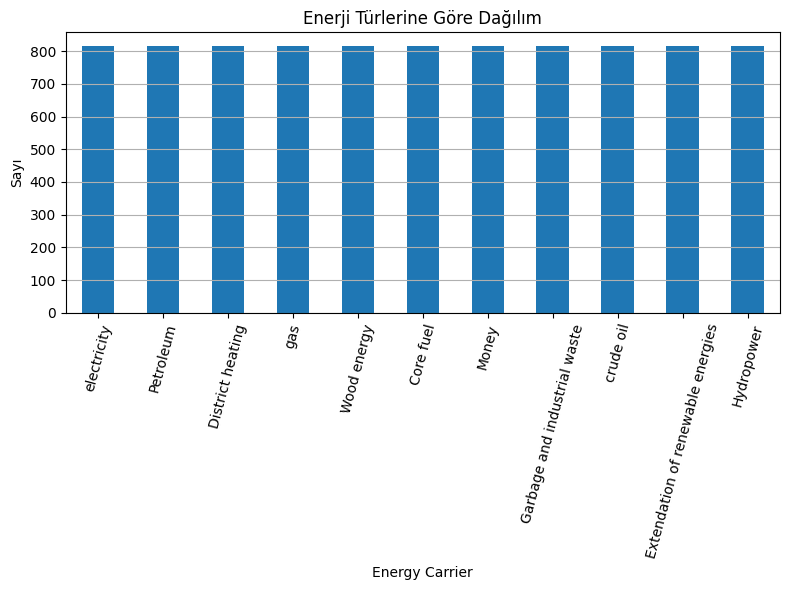

In [43]:
# Enerji türlerinin dağılımını görselleştirdim
enerji_turleri = df['Energy Carrier'].value_counts()

plt.figure(figsize=(8, 6))
enerji_turleri.plot(kind='bar')
plt.title('Enerji Türlerine Göre Dağılım')
plt.xlabel('Energy Carrier')
plt.ylabel('Sayı')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [44]:
df['Energy Carrier'].value_counts()

Energy Carrier
electricity                          817
Petroleum                            817
District heating                     817
gas                                  817
Wood energy                          817
Core fuel                            817
Money                                817
Garbage and industrial waste         817
crude oil                            817
Extendation of renewable energies    817
Hydropower                           817
Name: count, dtype: int64

In [45]:

# 'Petroleum' için veriyi filtreledim tabloda kullanmak için
petroleum_data = df[df["Energy Carrier"] == "Petroleum"]
petroleum_data = petroleum_data.sort_values(by="Year")
print(petroleum_data.head())


     Year                                  Category Energy Carrier  \
188  1980                          Warehouse change      Petroleum   
199  1980                   Non -energy consumption      Petroleum   
1    1980                         Gross consumption      Petroleum   
100  1980             Energy conversion - gas works      Petroleum   
111  1980  Energy conversion - nuclear power plants      Petroleum   

                TJ  
188  -15030.000000  
199   -6320.000000  
1    321250.000000  
100    -840.000000  
111   34238.764224  


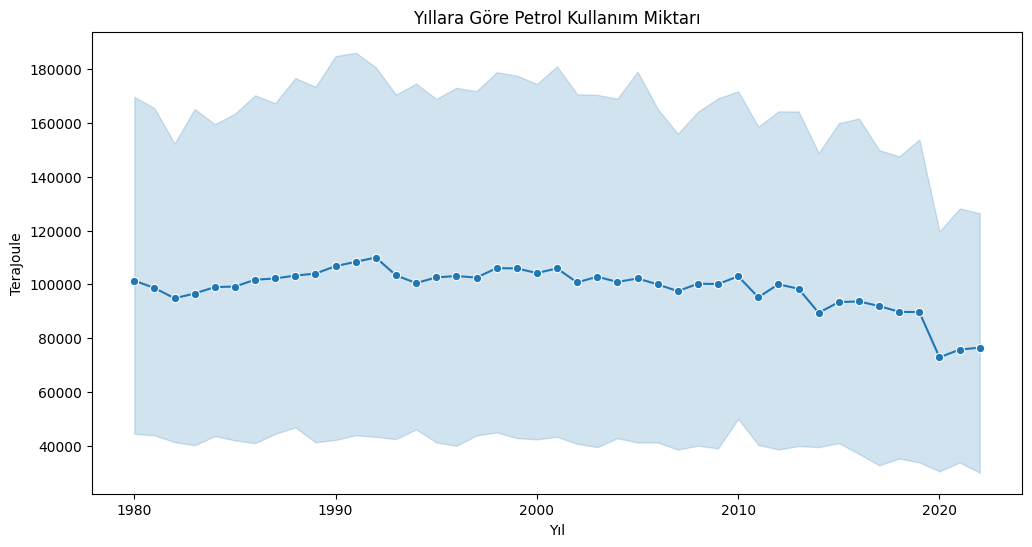

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=petroleum_data, x="Year", y="TJ", marker="o")
plt.title("Yıllara Göre Petrol Kullanım Miktarı")
plt.xlabel("Yıl")
plt.ylabel("TeraJoule")
plt.show()


In [47]:
electricty_data = df[df["Energy Carrier"] == "electricity"]
electricty_data = electricty_data.sort_values(by="Year")

print(electricty_data.head())


     Year                                  Category Energy Carrier  \
187  1980                          Warehouse change    electricity   
198  1980                   Non -energy consumption    electricity   
0    1980                         Gross consumption    electricity   
99   1980             Energy conversion - gas works    electricity   
110  1980  Energy conversion - nuclear power plants    electricity   

               TJ  
187  34238.764224  
198  34238.764224  
0   -29450.000000  
99   34238.764224  
110  49190.000000  


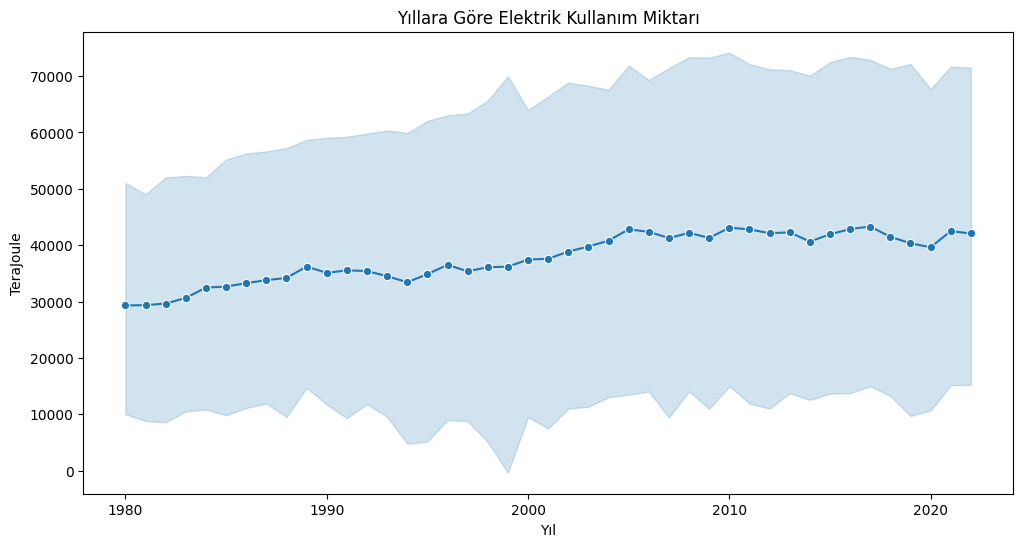

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=electricty_data, x="Year", y="TJ", marker="o")
plt.title("Yıllara Göre Elektrik Kullanım Miktarı")
plt.xlabel("Yıl")
plt.ylabel("TeraJoule")
plt.show()

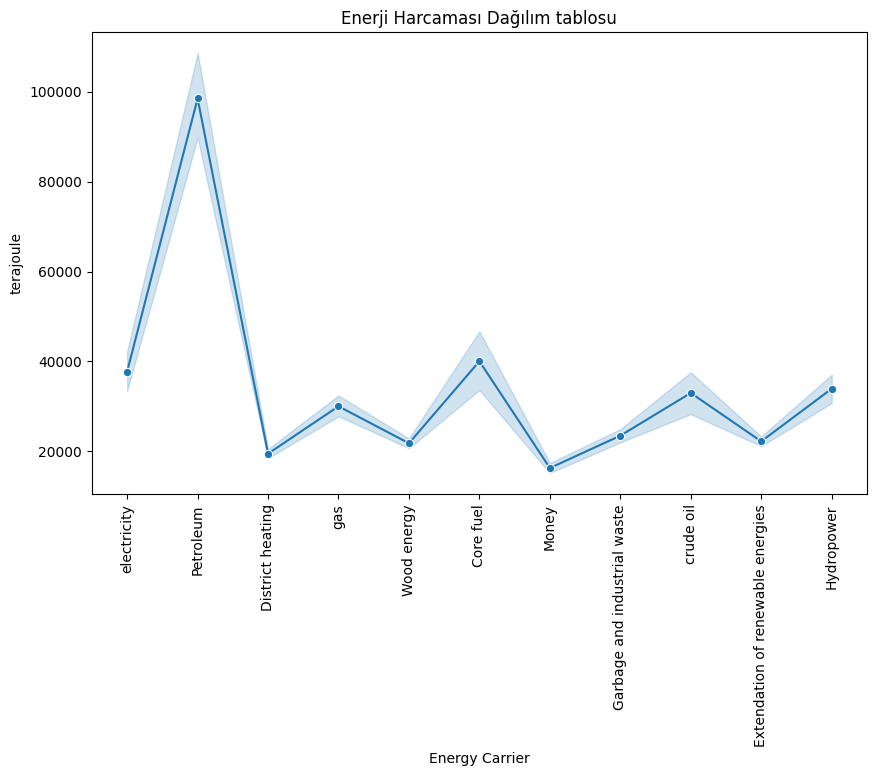

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Energy Carrier", y="TJ", data=df, marker='o')
plt.xticks(rotation=90)
plt.title("Enerji Harcaması Dağılım tablosu")
plt.xlabel("Energy Carrier")
plt.ylabel("terajoule")
plt.show()

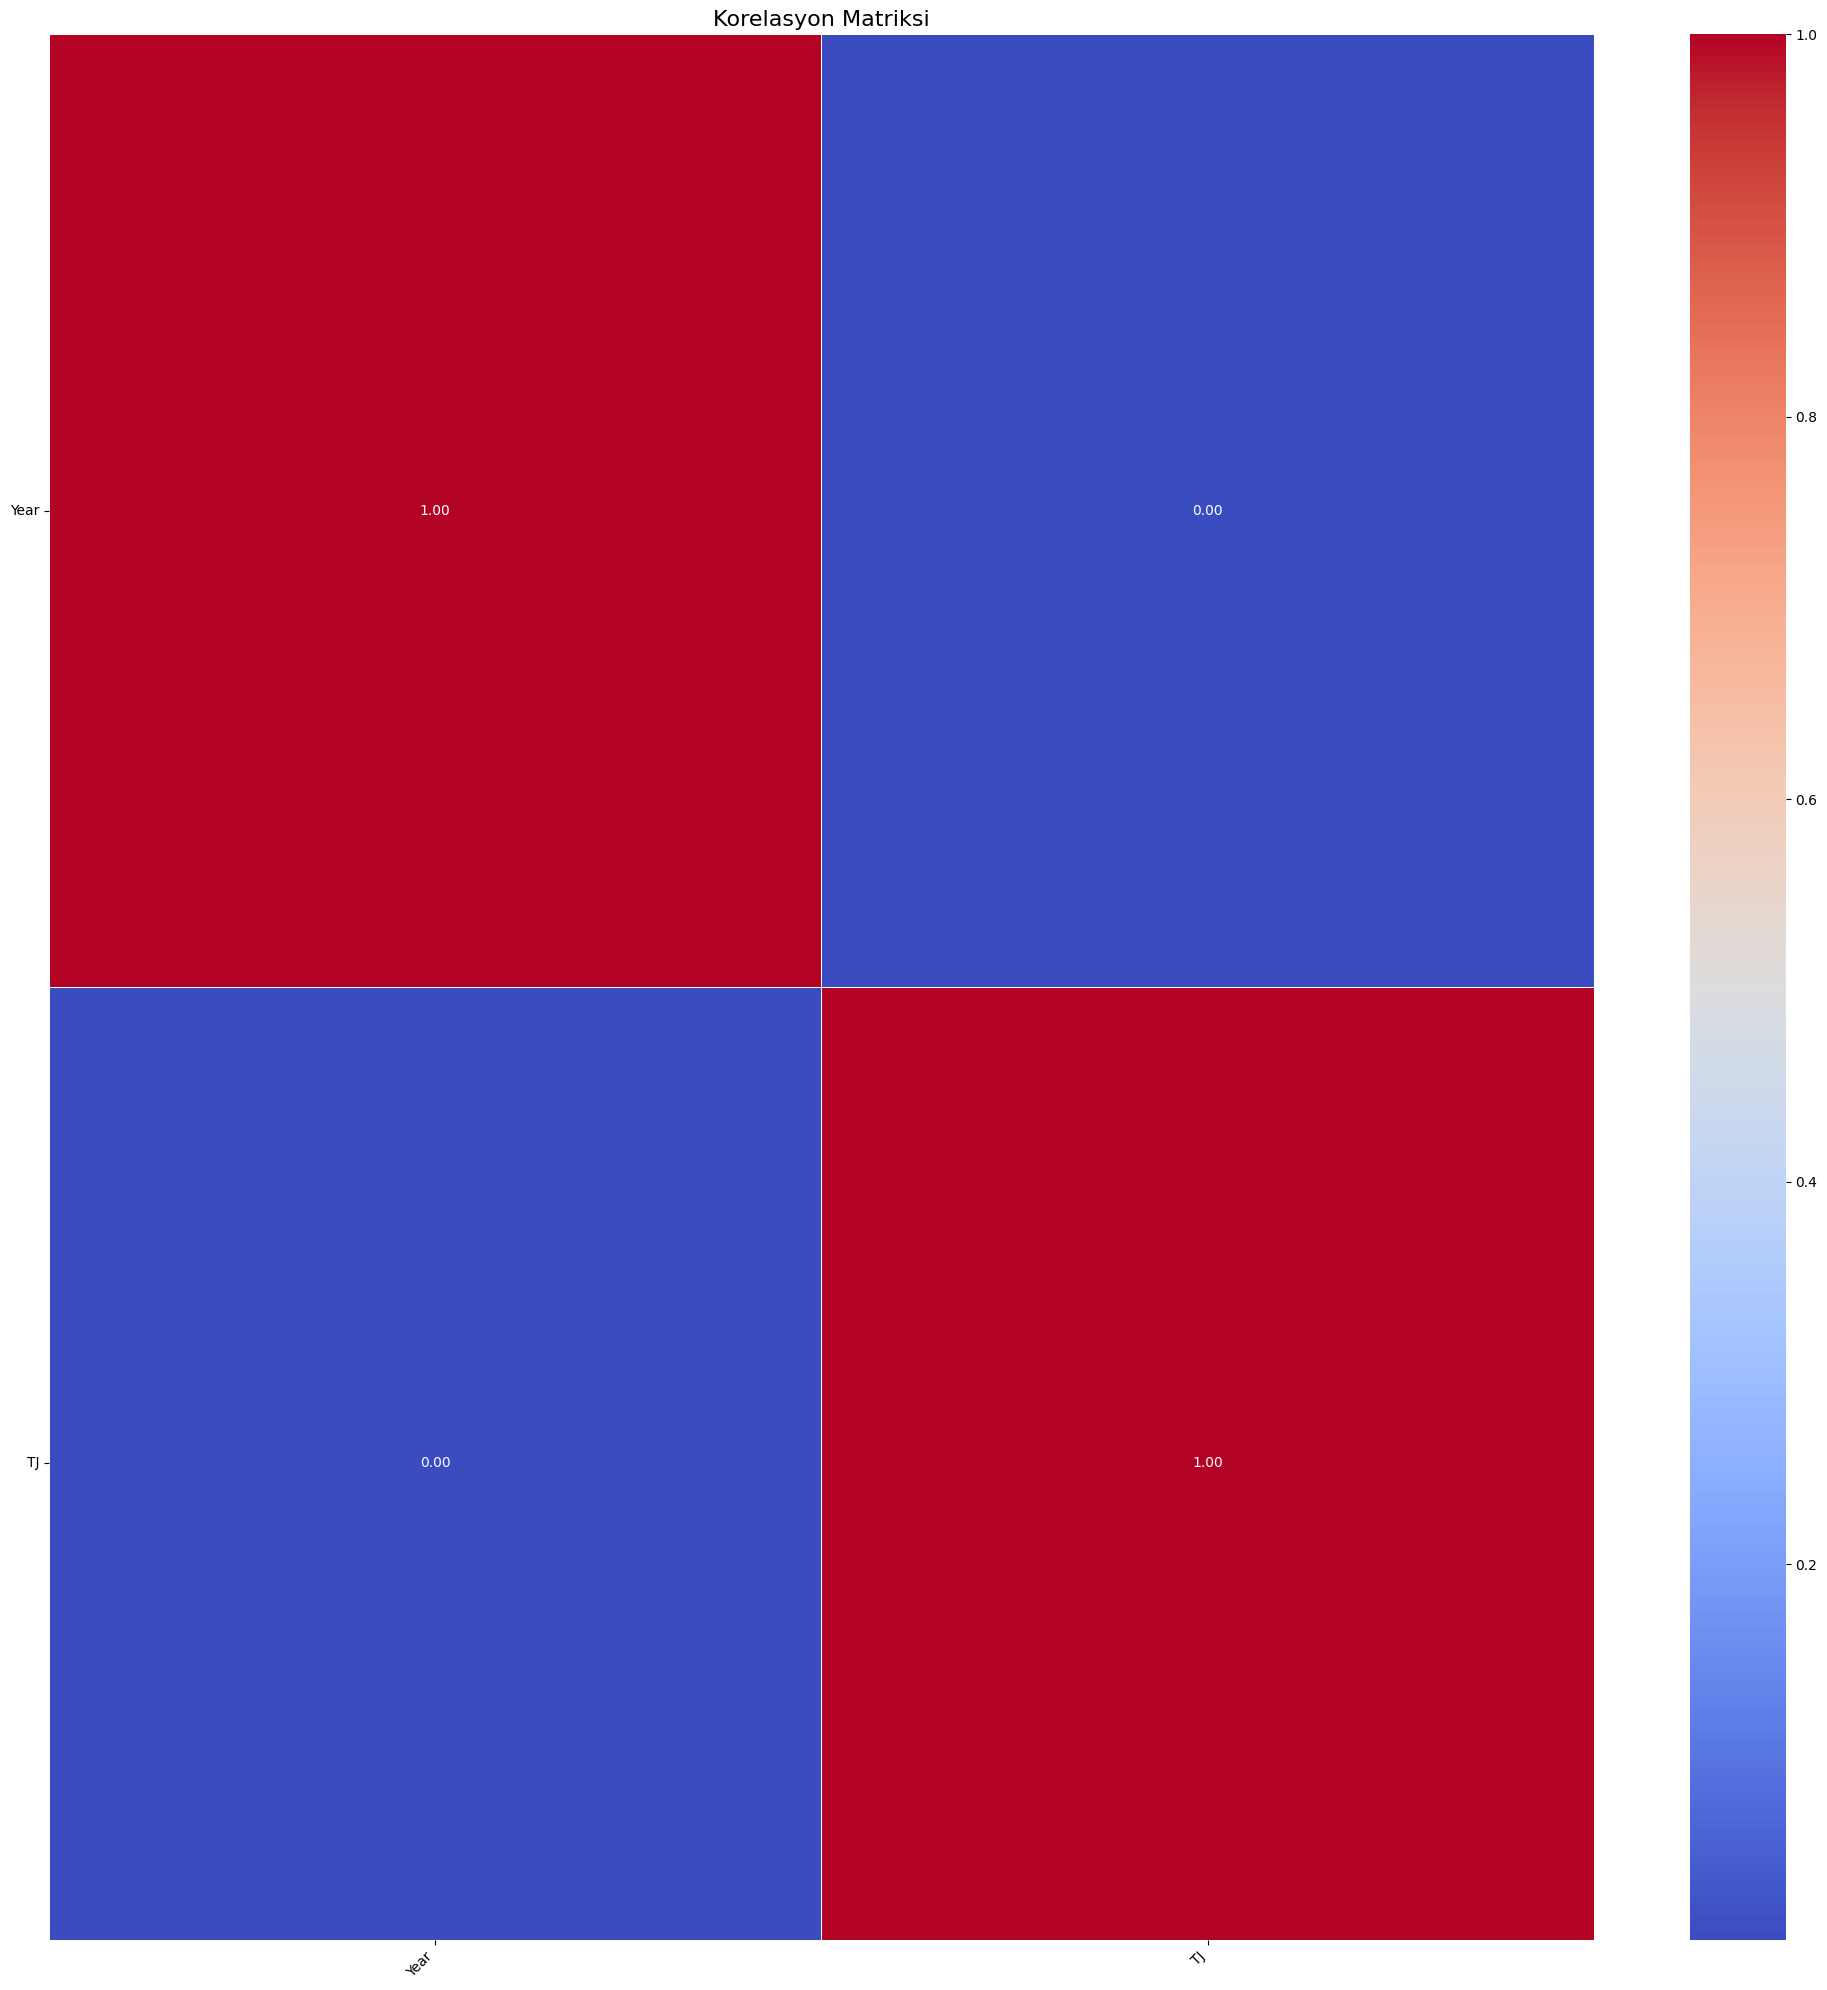

In [50]:
numeric_data = df.select_dtypes(include=["float64", "int64", "bool"])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matriksi", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [51]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
print(df.head())


   Year           Category    Energy Carrier        TJ
0  1980  Gross consumption       electricity  -29450.0
1  1980  Gross consumption         Petroleum  321250.0
2  1980  Gross consumption  District heating       0.0
3  1980  Gross consumption               gas   36280.0
4  1980  Gross consumption       Wood energy   26280.0


In [53]:
petroleum_data = df[df["Energy Carrier"] == "Petroleum"]


In [54]:
X = petroleum_data[["Year"]]
y = petroleum_data["TJ"]

# Eğitim ve test setlerini ayırdım x, eğitim y, değişken için
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Model eğitimi
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [56]:
# Tahminler
y_pred = model.predict(X_test)


In [57]:
# Model değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 23965313660.344418
R2 Score: -0.0756998770220294


In [58]:
# Gelecekteki tahminler
future_years = pd.DataFrame({"Year": [2025,2026,2027]})
future_predictions = model.predict(future_years)
print(f"Future Predictions: {future_predictions}") 

Future Predictions: [58626.14981541 58626.14981541 58626.14981541]
